# Knight's Tour Problem with Animation Export
This notebook implements the Knight's Tour problem with visualization and provides functionality to export the solution as both GIF and MP4 animations.

## Setup Required Libraries
Import necessary libraries and configure matplotlib for notebook display.

In [18]:
!pip install pygame
!pip install imageio-ffmpeg

In [19]:
import pygame
import time
import matplotlib.pyplot as plt
import imageio
import imageio_ffmpeg
import os
import numpy as np
from IPython.display import Image, display
%matplotlib inline

# Initialize Pygame
pygame.init()

(5, 0)

## Define Constants and Helper Functions
Setup the board configuration and implement utility functions.

In [20]:
# Constants
BOARD_SIZE = 8
SQUARE_SIZE = 60
WINDOW_SIZE = BOARD_SIZE * SQUARE_SIZE

# Colors
WHITE = (255, 255, 255)
BROWN = (139, 69, 19)
LIGHT_BROWN = (222, 184, 135)
YELLOW = (255, 235, 59)
BLACK = (0, 0, 0)

# Knight's moves
moves = [
    (2, 1), (2, -1), (-2, 1), (-2, -1),
    (1, 2), (1, -2), (-1, 2), (-1, -2)
]

# Initialize board and pygame surface
board = [[-1 for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
screen = pygame.Surface((WINDOW_SIZE, WINDOW_SIZE))
font = pygame.font.Font(None, 24)

def is_valid(x, y):
    return 0 <= x < BOARD_SIZE and 0 <= y < BOARD_SIZE and board[x][y] == -1

def get_degree(x, y):
    count = 0
    for dx, dy in moves:
        next_x, next_y = x + dx, y + dy
        if is_valid(next_x, next_y):
            count += 1
    return count

## Implement Knight's Tour Solver
Modified version of the solver that captures frames instead of displaying them.

In [21]:
def draw_board(current_pos=None):
    for row in range(BOARD_SIZE):
        for col in range(BOARD_SIZE):
            # Draw square
            color = LIGHT_BROWN if (row + col) % 2 == 0 else BROWN
            pygame.draw.rect(screen, color, (col * SQUARE_SIZE, row * SQUARE_SIZE, SQUARE_SIZE, SQUARE_SIZE))
            
            # Draw move number
            if board[row][col] != -1:
                pygame.draw.rect(screen, YELLOW, (col * SQUARE_SIZE, row * SQUARE_SIZE, SQUARE_SIZE, SQUARE_SIZE))
                text = font.render(str(board[row][col]), True, BLACK)
                text_rect = text.get_rect(center=(col * SQUARE_SIZE + SQUARE_SIZE // 2, row * SQUARE_SIZE + SQUARE_SIZE // 2))
                screen.blit(text, text_rect)
    
    # Draw knight position
    if current_pos:
        row, col = current_pos
        pygame.draw.circle(screen, BLACK, (col * SQUARE_SIZE + SQUARE_SIZE // 2, row * SQUARE_SIZE + SQUARE_SIZE // 2), SQUARE_SIZE // 3)
    
    return pygame.surfarray.array3d(screen)

def solve_knights_tour(x, y, move_num, frames):
    board[x][y] = move_num
    frames.append(draw_board((x, y)))
    
    if move_num == BOARD_SIZE * BOARD_SIZE - 1:
        return True
    
    next_moves = []
    for dx, dy in moves:
        next_x, next_y = x + dx, y + dy
        if is_valid(next_x, next_y):
            degree = get_degree(next_x, next_y)
            next_moves.append((next_x, next_y, degree))
    next_moves.sort(key=lambda m: m[2])
    
    for next_x, next_y, _ in next_moves:
        if solve_knights_tour(next_x, next_y, move_num + 1, frames):
            return True
    
    board[x][y] = -1
    frames.append(draw_board((x, y)))
    return False

## Create Animation Framework
Functions to generate and save animations from captured frames.

In [ ]:
def save_animation(frames, output_gif='knights_tour_solution.gif', output_mp4='knights_tour_solution.mp4'):
    # Save as GIF
    imageio.mimsave(output_gif, frames, fps=5)
    
    # Save as MP4
    imageio.mimsave(output_mp4, frames, fps=5)
    
    return output_gif, output_mp4

## Generate and Save Animations
Run the solver and create the animations.

Animations saved as knights_tour.gif and knights_tour.mp4


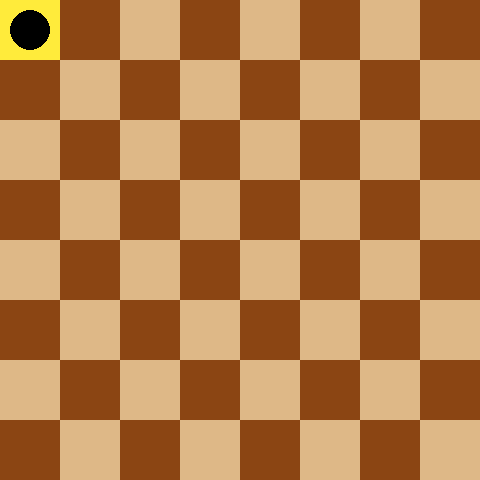

In [23]:
# Reset board
board = [[-1 for _ in range(BOARD_SIZE)] for _ in range(BOARD_SIZE)]
frames = []

# Solve and capture frames
start_x, start_y = 0, 0
solve_knights_tour(start_x, start_y, 0, frames)

# Save animations
gif_path, mp4_path = save_animation(frames)
print(f"Animations saved as {gif_path} and {mp4_path}")

# Display the GIF in the notebook
display(Image(filename=gif_path))